In [2]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 660.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.6 MB 1.0 MB/s eta 0:00:16
    --------------------------------------- 0.2/15.6 MB 1.4 MB/s eta 0:00:12
   - -------------------------------------- 0.4/15.6 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.6/15.6 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/15.6 MB 3.1 MB/s et

In [4]:
from pylab import  * 
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
import numpy as np
from datetime import datetime, timedelta
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import matplotlib.dates as mdates
from dogues_functions_2 import normal_data,  fetch_pageview_count
import ast

# 1) Fake news dataset

``We have a good amount of news to achieve a good analysis; however, some news have no date, therefore, they are not useful to track them along the time and compare the patern with the views of articles on wikipedia.``


In [5]:
source  = "Data/"
main_df = pd.read_csv(source+"news_dataset_cl.csv").copy()

In [6]:
df2 = main_df[["news_id","statement","fact_url", "label", "lang", "time", "Cluster"]].copy()


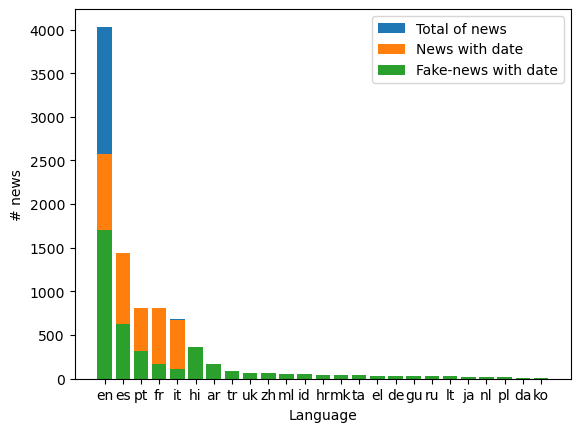

In [7]:
# Counting the total of news per language
filter_count = "label" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count],label="Total of news")
ylabel("# news")
xlabel("Language")

# Counting the total of news per language that are useful
filter_count = "time" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="News with date")

# Counting the total of fake news per language that are useful
filter_count = "time" 
an_lang   = pd.DataFrame(df2[df2["label"]=="fake"].groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="Fake-news with date")
legend()

Therefore we choose English, spanish, portuguese, french, and italian.

!!  here let's print the dimensions of our dataset or number of news per language.

`` Now let's focus on the news as a function of time and try to analyse when the news were published in time ``

In [8]:

# Counting the news per language along the time
languages_analyze = ["en", "es","pt", "fr", "it"]
count_news        = []
for i in languages_analyze:
    df_lang = pd.DataFrame(df2[df2["lang"]==i].groupby("time")["news_id"].count())
    df_new = df_lang.rename(columns={'news_id': i})
    count_news.append(df_new)
result  = pd.concat(count_news, axis=1)
results = result.fillna(0)   
df = results

# Convert the 'time' index to a datetime format
df['time_1'] = pd.to_datetime(df.index, format='%d/%m/%Y')

df = df.sort_values(by='time_1')
# Example usage:
language = "en"
articles_list = ["Covid-19"]
result=fetch_pageview_count(language, articles_list)



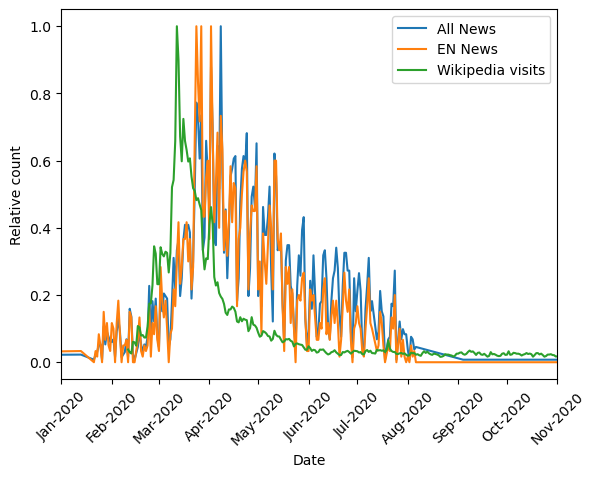

In [9]:

# Create a time series of all the news
plot(df["time_1"],normal_data(df["en"]+df["es"]+df["pt"]+df["fr"]+df["it"]),label="All News")
plot(df["time_1"],normal_data(df["en"]),label="EN News")
# Create a time series of all the visits
plot(result["Covid-19"]["timestamp"], normal_data(result["Covid-19"]["views"]), label="Wikipedia visits")


xlabel('Date')
ylabel('Relative count')
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 11, 1)
xlim(start_date, end_date)
date_format = DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(axis='x', rotation=45) 
legend()

# Profile of fake news per language

In [10]:

languages_analyze = ["en", "es","pt", "fr", "it", "hi"]
count_news        = []
for i in languages_analyze:
    df_query = df2 
    df_lang = pd.DataFrame(df2[ (df2["lang"]==i) & (df2["label"]=="fake") ].groupby("time")["news_id"].count())
    df_new = df_lang.rename(columns={'news_id': i+"-fake"})
    count_news.append(df_new)
result  = pd.concat(count_news, axis=1)
results = result.fillna(0)   
df_fake = results

languages_analyze = ["en", "es","pt", "fr", "it", "hi"]
count_news        = []

for i in languages_analyze:
    df_query = df2 
    df_lang = pd.DataFrame(df2[ (df2["lang"]==i) & (df2["label"]=="real") ].groupby("time")["news_id"].count())
    df_new = df_lang.rename(columns={'news_id': i+"-real"})
    count_news.append(df_new)
result  = pd.concat(count_news, axis=1)
results = result.fillna(0)   
df_real = results

df_consolidated = pd.concat([df_fake,df_real],axis=1).fillna(0)  


# Convert the 'time' column to a datetime format
df_consolidated['time_1'] = pd.to_datetime(df_consolidated.index, format='%d/%m/%Y')

df_consolidated = df_consolidated.sort_values(by='time_1')

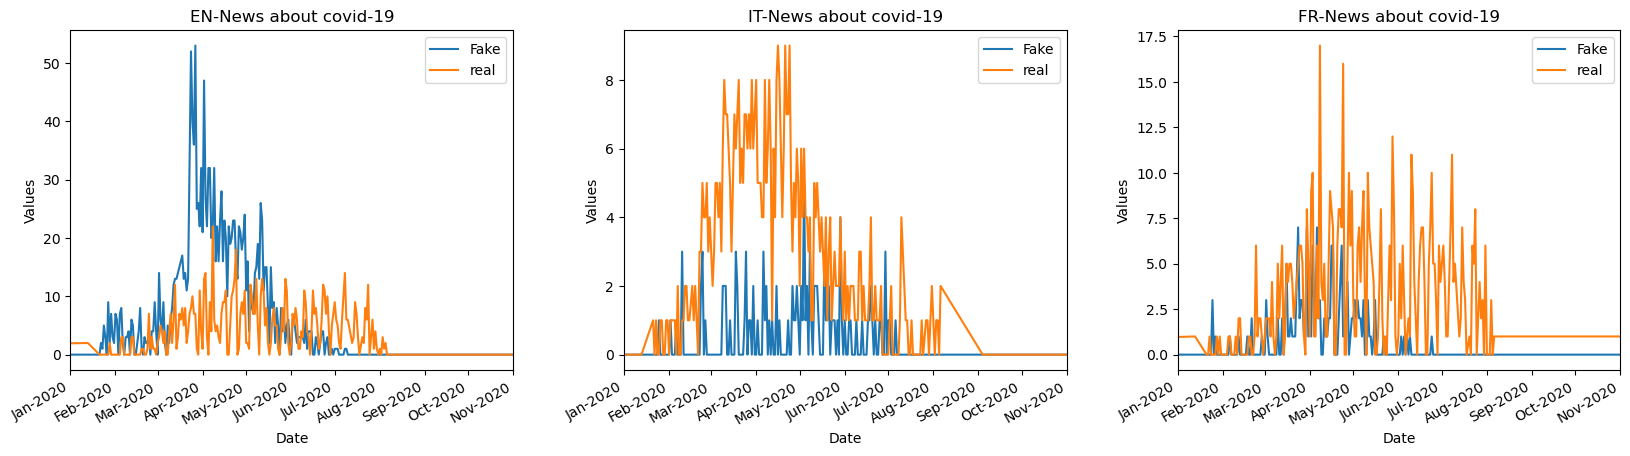

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1, 1,1]})


ax[0].plot(df_consolidated["time_1"], df_consolidated["en-fake"], label='Fake')
ax[0].plot(df_consolidated["time_1"], df_consolidated["en-real"], label='real')
ax[0].set_title('EN-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[1].plot(df_consolidated["time_1"], df_consolidated["it-fake"], label='Fake')
ax[1].plot(df_consolidated["time_1"], df_consolidated["it-real"], label='real')
ax[1].set_title('IT-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[2].plot(df_consolidated["time_1"], df_consolidated["fr-fake"], label='Fake')
ax[2].plot(df_consolidated["time_1"], df_consolidated["fr-real"], label='real')
ax[2].set_title('FR-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed


# Setting the x-axis locator
for i in range(0,3):
    locator = AutoDateLocator(minticks=9, maxticks=12)  # Adjust min and max ticks as needed
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    # Adding labels and title
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Values')
    
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2020, 11, 1)
    ax[i].set_xlim(start_date, end_date)
    # Display the legend
    ax[i].legend()

# Show the plot
plt.show()

**CLUSTERING**

In [12]:
main_df_eng = main_df[main_df['lang'] == 'en'].copy()
#main_df_eng = main_df_eng.dropna(subset=['time'])
print("Number of English news:",len(main_df_eng))

##topics taken from covid-19_misinformation.csv, 
#hand picked to maximize the research in the MM-covid dataset with something that makes sense

words_to_search =["spread","Wuhan", "Canada", "China accusations", "china mortality", "Russia accusations",
                  "Muslim","USA mortality", "Germany", "Britain", "Jewish origin", "5G", "bat", 
                  "ivermectin", "hydroxychloroquine", "treatment", "bioweapon", "mortality", "prevention",
                  "vitamin D", "silver", "vitamin C", "virus origin", "meteor", "casedemic", 
                  "patient zero", "lifetime", "mosquitos", "breastfeeding", "hand sanitizer", "face masks", "whistleblower",
                 "deaths", "immunity", "airborne", "surfaces", "ethnicity", "large gathering", "cruise ships",
                 "alcohol", "tobacco", "drugs", "drink", "religious protection", "spraying", "food", "flu", "2-Deoxy-D-glucose", 
                 "mustard", "organ trafficking", "Simpsons", "wildlife", "origin", "Jhons Hopkins", "virus origin", "infertility"]

# Create a new column 'category' and set it to be the word if the word is present in the 'claim' column,
#otherwise set it to NaN

main_df_eng['category'] = main_df_eng['claim'].apply(lambda x: [word for word in words_to_search if word.lower() in str(x).lower()]).copy()

# Filter the DataFrame to include only the classified rows
filtered_df = main_df_eng[main_df_eng['category'].apply(lambda x: bool(x))].copy()
filtered_df['category'] = filtered_df['category'].apply(lambda x: ', '.join(x))


#Let's see how many we classified
print("Number of classified news:",len(filtered_df))


category_counts = filtered_df['category'].value_counts()
label_counts = filtered_df['label'].value_counts()
print("Number of unique categories: ", len(category_counts))
print("Count of news per category (top ten):", 
      category_counts[:10])

Number of English news: 4032
Number of classified news: 706
Number of unique categories:  83
Count of news per category (top ten): category
spread       89
bat          65
food         51
Wuhan        50
treatment    45
5G           35
flu          35
deaths       32
Muslim       28
drink        26
Name: count, dtype: int64


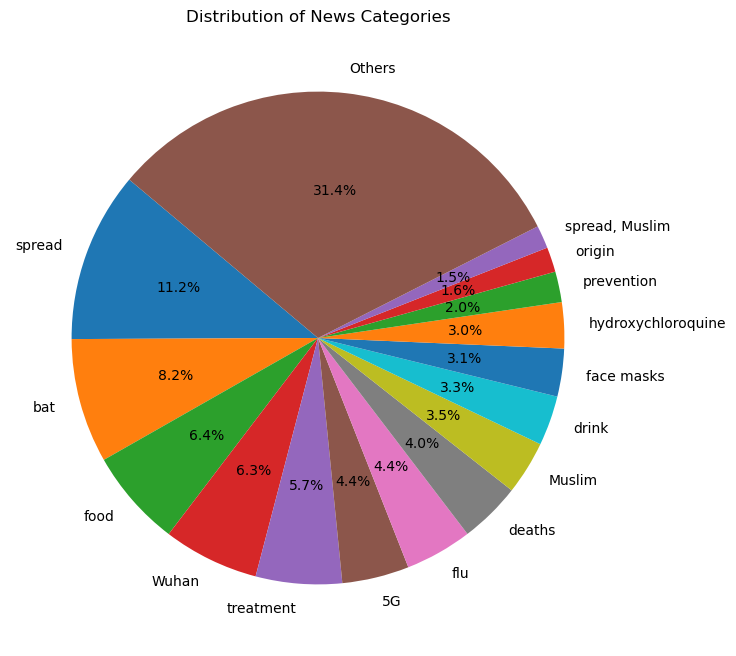

In [13]:
# Get the top 15 categories
top_categories = category_counts.head(15)

# Sum the counts of the remaining categories
other_categories_count = category_counts.iloc[10:].sum()

# Create a new series with top categories and 'Others'
combined_categories = pd.concat([top_categories, pd.Series({'Others': other_categories_count})])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of News Categories')
plt.show()

``So now we have a pool of classified data to study. Now the question is, how well do the themes of the two datasets match? we can count how many words from the misinformation dataset have been found in the MM-dataset.``

In [14]:
#Let's see how many words have been found:

# Flatten the 'category' lists into a single list of words
all_found_words = [word for sublist in filtered_df['category'] for word in sublist]

# Count the unique found words
unique_found_words = set(all_found_words)
num_unique_found_words = len(unique_found_words)

# Calculate the percentage of words found
percentage_found = int( (num_unique_found_words / len(words_to_search)) * 100)

# Print the results
print("\nPercentage of words found:", percentage_found,"%")


Percentage of words found: 62 %


``Roughly 60% of the most famous misinformation topics in wikipedia appear in the news considered by the MM-dataset. This is good news, it means that the MM-dataset is representative enough of covid's misinformation realm, and that the wikipedia "Covid-19 misinformation" is reliable ad complete.
But how many of these news are actually fake news?``

In [15]:
#create a list of categories to count the real and fake ones
category_label_list = []
for _, row in filtered_df.iterrows():
    category_label_list.append({'category': row['category'], 'label': row['label']})

# Create a DataFrame from the list of dictionaries
category_label_df = pd.DataFrame(category_label_list).copy()

# Pivot the table to have 'fake' and 'real' counts as columns
label_counts_per_category = category_label_df.pivot_table(index='category', columns='label', aggfunc='size', fill_value=0)
label_counts_per_category = label_counts_per_category.reindex(index=category_counts.index)


# Print the counts
print("\nLabel Counts per Category:\n", label_counts_per_category.head(15))


#check if the total of categories and news is still correct and that we haven't lost anything
print("number fo categories:", len(label_counts_per_category))
total_fake_labels = label_counts_per_category['fake'].sum()
total_real_labels = label_counts_per_category['real'].sum()
print("\nTotal Fake and Real Labels:", total_fake_labels + total_real_labels)




Label Counts per Category:
 label               fake  real
category                      
spread                57    32
bat                   18    47
food                  40    11
Wuhan                 44     6
treatment             20    25
5G                    32     3
flu                   26     9
deaths                27     5
Muslim                28     0
drink                 26     0
face masks            21     4
hydroxychloroquine    19     5
prevention             7     9
origin                10     3
spread, Muslim        12     0
number fo categories: 83

Total Fake and Real Labels: 706


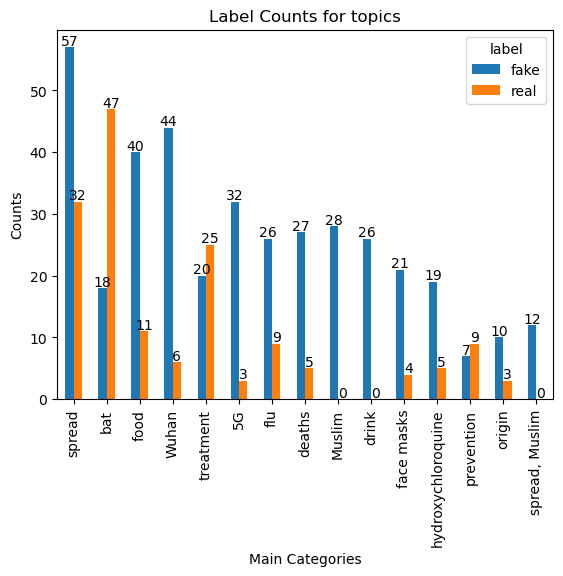

In [16]:
ax = label_counts_per_category.head(15).plot(kind='bar', stacked=False)
plt.title('Label Counts for topics')
plt.xlabel('Main Categories')
plt.ylabel('Counts')

# Add annotations to display the total count on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+1), ha='center', va='center')

plt.show()

``We can see that the results are quite dispersive, to gain a logical understanding of what is most published, let's try to further group the topics under 5 big headings: news about the origin of covid, its spread, prevention, and treatment.

Total number of news: 706


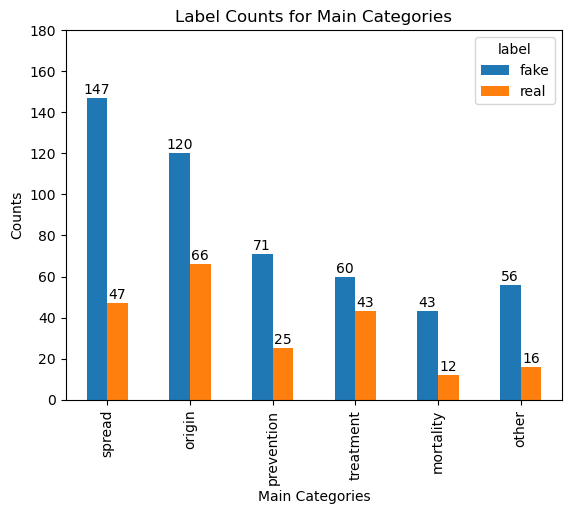

Values mapped to 'others':
Index(['food', 'Canada', 'wildlife', 'Simpsons', 'tobacco', 'Britain',
       '5G, immunity', 'whistleblower', 'spread, treatment', 'Britain, 5G',
       'Canada, Muslim', 'whistleblower, drink'],
      dtype='object', name='category')


In [17]:
main_category = ["origin", "mortality", "spread", "prevention", "treatment"]

# Mapping dictionary for subcategories to main categories. 
#This was done by hand to ensure that the right combination of topics will lead to the right mapping of main_category.

subcategory_mapping = {
    'bat':'origin',
    'bat, drink':'origin',
    'Wuhan': 'origin',
    'Wuhan, bioweapon':'origin',
    'airborne': 'origin',
    'bioweapon': 'origin',
    'virus origin': 'origin',
    'origin': 'origin',
    'Canada, bioweapon' : 'origin',
    '5G': 'origin',
    'bat, flu':'origin',
    'spread, origin':'origin',
    'bioweapon, origin':'origin',
    'virus origin, origin, virus origin': 'origin',
    'Wuhan, bat, virus origin, origin, virus origin':'origin',
    'bat, patient zero':'origin', 
    'Wuhan, drink':'origin',
    'bat, origin':'origin',
    'Wuhan, origin':'origin',
    'patient zero': 'origin',
    
    'deaths': 'mortality',
    'Germany': 'mortality',
    'mortality':'mortality',
    'deaths, flu':'mortality',
    'mortality, flu':'mortality',
    'mortality, ethnicity' : 'mortality',
    'mortality, vitamin D':'mortality',
    'Wuhan, deaths': 'mortality',
    'Germany, deaths':'mortality',
    'deaths, immunity':'mortality',
    'deaths, drink':'mortality',
    
    'flu': 'spread',
    'immunity': 'spread',
    'large gathering': 'spread',
    'spraying': 'spread',
    'Muslim': 'spread',
    'Muslim, food': 'spread',                                   
    'Muslim, large gathering': 'spread',                         
    'Muslim, spread': 'spread',                                
    'Muslim, spread, food' : 'spread', 
    'Wuhan, spread' : 'spread',
    'spread':'spread',
    'infertility': 'spread',
    'spreading':'spread',
    'diffusing':'spread',
    'surfaces':'spread',
    'spread, food':'spread',
    'bat, spread':'spread',
    'spread, face masks':'spread',
    'spread, spraying':'spread',
    'spread, infertility': 'spread', 
    'spread, alcohol':'spread',
    'spread, flu':'spread',
    'spread, Wuhan':'spread',
    'spread, hydroxychloroquine, drugs':'spread',
    'spread, bat': 'spread',
    'spread, Muslim':'spread',
    'spread, Muslim, food':'spread',
    
    'hand sanitizer': 'prevention',
    'drink': 'prevention',
    'face masks': 'prevention',
    'alcohol': 'prevention',
    'immunity':'prevention',
    'prevention': 'prevention',
    'prevention, spread':'prevention',
    'hand sanitizer, alcohol':'prevention',
    'immunity, food':'prevention',
    'prevention, deaths, flu':'prevention',
    'spread, prevention':'prevention',
    
    'hydroxychloroquine':'treatment',
    'drugs':'treatment',
    'mustard':'treatment',
    'vitamin C':'treatment',
    'vitamin D':'treatment',
    'treatment, vitamin C' :'treatment',
    'treatment':'treatment',
    'hydroxychloroquine, treatment':'treatment',
    'treatment, prevention':'treatment',
    'hydroxychloroquine, flu': 'treatment',
    'treatment, food':'treatment',
    'hydroxychloroquine, treatment, drink': 'treatment',
    'hydroxychloroquine, spread, drugs':'treatment',
    'treatment, spread':'treatment',
    'silver':'treatment',
    'alcohol, drink':'treatment'
    
}

#Now we create a new column for the main category and fill it with the mapping dictionary. What is not mapped is ategorized as other.
label_counts_per_category['main_category'] = label_counts_per_category.index.map(subcategory_mapping).fillna('other')

# Aggregate categories into main categories and sum the number of news
label_counts_per_main_category = label_counts_per_category.groupby('main_category').sum()

#print thr total number of news to be sure we didn't lose anything
total_fake = label_counts_per_main_category['fake'].sum()
total_real = label_counts_per_main_category['real'].sum()
total_news = total_fake + total_real
print("Total number of news:", total_news)


order = ["spread","origin",  "prevention", "treatment", "mortality", "other"]
#plot the news count for each main category
ax = label_counts_per_main_category.loc[order].plot(kind='bar', stacked=False)

plt.title('Label Counts for Main Categories')
plt.ylim(0,180)
plt.xlabel('Main Categories')
plt.ylabel('Counts')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+4), ha='center', va='center')

plt.show()

# Add this before the mapping step
print("Values mapped to 'others':")
print(label_counts_per_category.index[label_counts_per_category['main_category'] == 'other'])


##The 'Other' group mainly contains the "food" categories for which there is no clear main category 

``It seems that the majority of fake news are about the spread and origin of covid. From the previous plot we know that the majority of theories about the origin of covid are about Wuhan, bats, and 5G, while for spreading we have mainly news about the flu, large gatherings, and muslims.``

``The next analysis will be done in time, when were the news published? and can they be linked with the views in wikipedia pages of the corresponding theories?``

In [18]:
#First, let's filter the main database to keep only the news with publication dates
main_df_eng_date = main_df_eng.dropna(subset=['time']).copy()

#now we repeat the last analysis
main_df_eng_date['category'] = main_df_eng_date['claim'].apply(lambda x: [word for word in words_to_search if word.lower() in str(x).lower()]).copy()

# Filter the DataFrame to include only the classified rows
filtered_df = main_df_eng_date[main_df_eng_date['category'].apply(lambda x: bool(x))].copy()
filtered_df['category'] = filtered_df['category'].apply(lambda x: ', '.join(x))


#Let's see how many we classified
print("Number of classified news:",len(filtered_df))


category_counts = filtered_df['category'].value_counts()
label_counts = filtered_df['label'].value_counts()
print("Number of unique categories: ", len(category_counts))
print("Count of news per category (top ten):", 
      category_counts[:5])

Number of classified news: 443
Number of unique categories:  67
Count of news per category (top ten): category
bat       48
spread    46
food      44
Wuhan     29
Muslim    27
Name: count, dtype: int64


In [19]:
#create a list of categories to count the real and fake ones
category_label_list = []
for _, row in filtered_df.iterrows():
    category_label_list.append({'category': row['category'], 'label': row['label']})

# Create a DataFrame from the list of dictionaries
category_label_df = pd.DataFrame(category_label_list).copy()

# Pivot the table to have 'fake' and 'real' counts as columns
label_counts_per_category = category_label_df.pivot_table(index='category', columns='label', aggfunc='size', fill_value=0)
label_counts_per_category = label_counts_per_category.reindex(index=category_counts.index)


# Print the counts
print("\nLabel Counts per Category:\n", label_counts_per_category.head(5))


#check if the total of categories and news is still correct and that we haven't lost anything
print("number fo categories:", len(label_counts_per_category))
total_fake_labels = label_counts_per_category['fake'].sum()
total_real_labels = label_counts_per_category['real'].sum()
print("\nTotal Fake and Real Labels:", total_fake_labels + total_real_labels)



Label Counts per Category:
 label     fake  real
category            
bat         18    30
spread      46     0
food        39     5
Wuhan       29     0
Muslim      27     0
number fo categories: 67

Total Fake and Real Labels: 443


Total number of news: 443


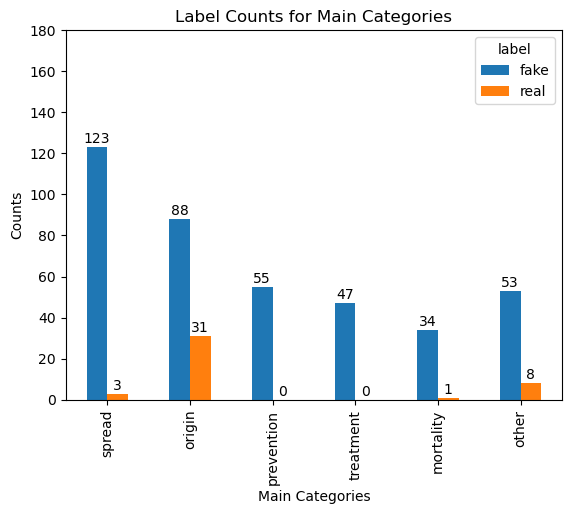

Values mapped to 'others':
Index(['food', 'Canada', 'tobacco', 'Canada, Muslim', '5G, immunity',
       'Britain', 'whistleblower, drink', 'Britain, 5G', 'Simpsons',
       'whistleblower'],
      dtype='object', name='category')


In [20]:
#Now we create a new column for the main category and fill it with the mapping dictionary. What is not mapped is ategorized as other.
label_counts_per_category['main_category'] = label_counts_per_category.index.map(subcategory_mapping).fillna('other')

# Aggregate categories into main categories and sum the number of news
label_counts_per_main_category = label_counts_per_category.groupby('main_category').sum()

#print thr total number of news to be sure we didn't lose anything
total_fake = label_counts_per_main_category['fake'].sum()
total_real = label_counts_per_main_category['real'].sum()
total_news = total_fake + total_real
print("Total number of news:", total_news)


order = ["spread","origin",  "prevention", "treatment", "mortality", "other"]
#plot the news count for each main category
ax = label_counts_per_main_category.loc[order].plot(kind='bar', stacked=False)

plt.title('Label Counts for Main Categories')
plt.ylim(0,180)
plt.xlabel('Main Categories')
plt.ylabel('Counts')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+4), ha='center', va='center')

plt.show()

# Add this before the mapping step
print("Values mapped to 'others':")
print(label_counts_per_category.index[label_counts_per_category['main_category'] == 'other'])



# Part 3.5

``We can see the trend for the fake news is very similar, just with less data and sometimes no real news related.``

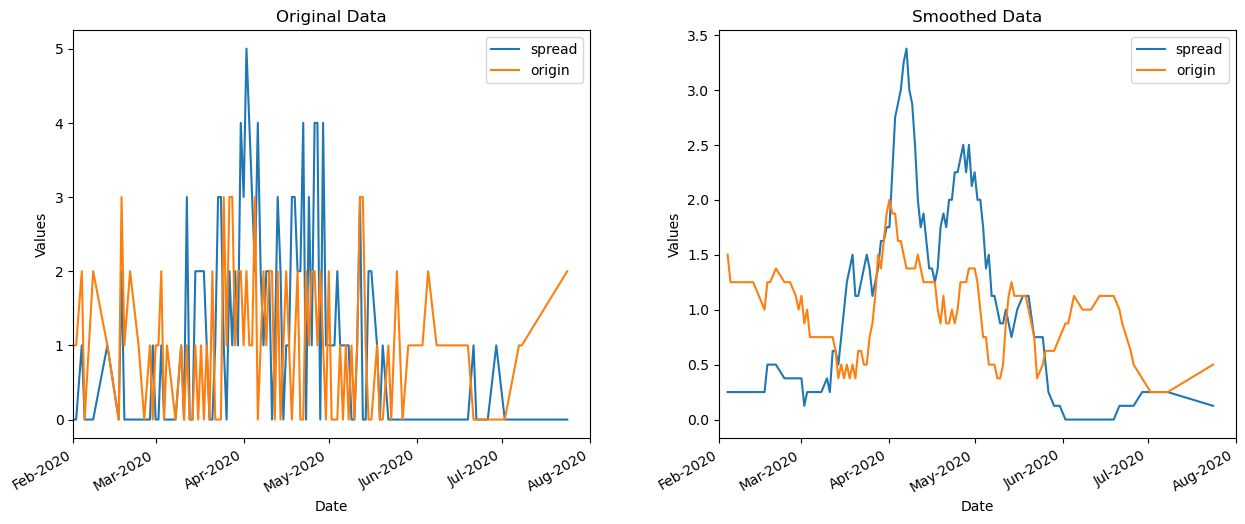

In [21]:
category_to_plot = ['spread', 'origin']

filtered_df['time'] = pd.to_datetime(filtered_df['time'], format='%d/%m/%Y')

filtered_df['main_category'] = filtered_df['category'].map(subcategory_mapping).fillna('other')

# Group by both 'time' and 'main_category' and sum the counts
label_counts_over_time = filtered_df.groupby(['time', 'main_category']).size().unstack(fill_value=0)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1,1]})
for category in category_to_plot:
    category_data = label_counts_over_time[category]
    ax[0].plot(category_data.index, category_data, label=category)
    date_format = DateFormatter('%b-%Y')
    ax[0].xaxis.set_major_formatter(date_format)
    ax[0].tick_params(axis='x', rotation=45) 
ax[0].set_title('Original Data')

for category in category_to_plot:
    category_data = label_counts_over_time[category]
    category_data_smooth = category_data.rolling(window=8).mean()
    ax[1].plot(category_data.index, category_data_smooth, label=category)
    
ax[1].set_title('Smoothed Data')


# plt.show()
for i in range(0,2):
    locator = AutoDateLocator(minticks=5, maxticks=12)  # Adjust min and max ticks as needed
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    # Adding labels and title
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Values')
    
    start_date = datetime(2020, 2, 1)
    end_date = datetime(2020, 8, 1)
    ax[i].set_xlim(start_date, end_date)
    # Display the legend
    ax[i].legend()

``It makes sense that the origin fake news are more disperseed in time, while the spread seem to be concentrated in beginning of april. when the lockdown started, more news on how desease spread. ``

now let's try to compare this with the wikipedia views of the related conspiracy theories?:

### Comparing clustered news with clustered articles in wikipedia + baseline (2019) extraction

``We selected 2 clusters wiht the highest amount of news to do the comparison of wikipedia visits along the time and number of news along the time. These clusters are: Virus origin and Disease spread``

In [23]:
# Importing misinformation database from part II
wiki_pages_links = pd.read_csv(source+"covid-19_misinformation5.csv").copy()

#Filtering misinformation with the selected clusters
word_cluster_1= "Virus origin" 
word_cluster_2= "Disease spread"

wiki_cluster_links_1 = wiki_pages_links[(wiki_pages_links["Main Heading"].str.contains(word_cluster_1))].copy()
wiki_cluster_links_2 = wiki_pages_links[(wiki_pages_links["Main Heading"].str.contains(word_cluster_2))].copy()

# Cleaning the clusters to only obtain words searcheable in wikipedia API
def extract_clean_text(links):
    cleaned_links = []
    for link in links:
        if '/wiki/' in link:
            extracted_text = link.split('/wiki/')[1].split('#')[0].replace('_', ' ')
            cleaned_links.append(extracted_text)
    return cleaned_links

# Convert string representation of list to actual list using ast.literal_eval and apply the function
wiki_cluster_links_1["Cleaned_Text"] = wiki_cluster_links_1["Links"].apply(lambda x: extract_clean_text(ast.literal_eval(x)))
wiki_cluster_links_2["Cleaned_Text"] = wiki_cluster_links_2["Links"].apply(lambda x: extract_clean_text(ast.literal_eval(x)))

In [24]:
# Looking for all the articles in the cluster 1 which correspond to Virus Origin 

list_cluster_1 = list(wiki_cluster_links_1["Cleaned_Text"])
language      = "en"
final_count_1 =[]
for i in list_cluster_1:
    results   = fetch_pageview_count(language, i)
    merged_df = pd.concat(results, ignore_index=True)
    #Grouping the dataframe to sum up the views
    merged_df = merged_df.groupby(['timestamp'])["views"].sum()
    final_count_1.append(pd.DataFrame(merged_df))

In [25]:
# Looking for all the articles in the cluster 2 which correspond to Spread

list_cluster_2 = list(wiki_cluster_links_2["Cleaned_Text"])
del list_cluster_2[7] # Outlier - this element has an empty list that doesn't allow to concatenate the data frame
final_count_2 =[]
for i in list_cluster_2:
    results   = fetch_pageview_count(language, i)
    merged_df = pd.concat(results, ignore_index=True)
    #Grouping by date the dataframe to sum up the views
    merged_df = merged_df.groupby(['timestamp'])["views"].sum()
    final_count_2.append(pd.DataFrame(merged_df))

In [26]:
# Concatenating all the dataframes
final_views_1= pd.concat(final_count_1, ignore_index=False) 
final_views_2= pd.concat(final_count_2, ignore_index=False) 

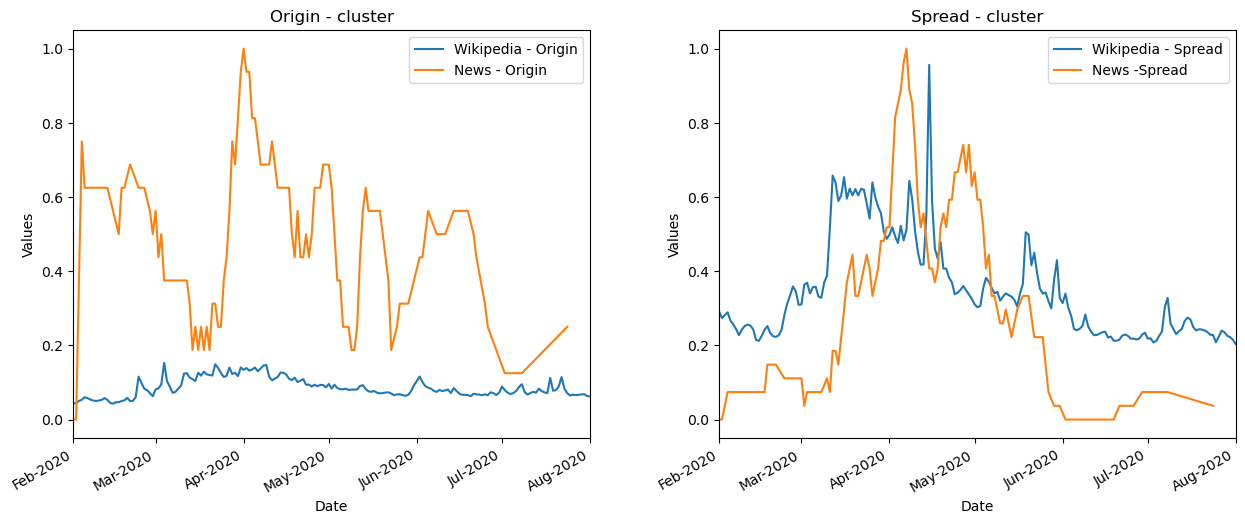

In [27]:
# Grouping the new data frame to get the final number of visits
data_1 = final_views_1.groupby(['timestamp']).sum()
data_2 = final_views_2.groupby(['timestamp']).sum()

# # Convert the 'time' index to a datetime format
data_1['time_1'] = pd.to_datetime(data_1.index, format='%d/%m/%Y')
data_2['time_1'] = pd.to_datetime(data_2.index, format='%d/%m/%Y')

#ploting the normalized result to compare the peaks in visits of wikipedia and number of news
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1,1]})


ax[0].plot(data_1["time_1"][1:1000], normal_data(data_1["views"][1:1000]), label='Wikipedia - Origin')
category_data = label_counts_over_time[category_to_plot[1]]
category_data_smooth = category_data.rolling(window=8).mean()
ax[0].plot(category_data.index,normal_data(category_data_smooth.fillna(0)), label="News - Origin")
    
ax[0].set_title('Smoothed Data')
ax[0].set_title('Origin - cluster')
date_format = DateFormatter('%b-%Y')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[1].plot(data_2["time_1"][1:1000],normal_data( data_2["views"][1:1000]), label='Wikipedia - Spread')
category_data = label_counts_over_time[category_to_plot[0]]
category_data_smooth = category_data.rolling(window=8).mean()
ax[1].plot(category_data.index, normal_data(category_data_smooth.fillna(0)), label="News -Spread")

ax[1].set_title('Spread - cluster')
date_format = DateFormatter('%b-%Y')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

for i in range(0,2):
    locator = AutoDateLocator(minticks=5, maxticks=12)  # Adjust min and max ticks as needed
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    # Adding labels and title
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Values')
    
    start_date = datetime(2020, 2, 1)
    end_date = datetime(2020, 8, 1)
    ax[i].set_xlim(start_date, end_date)
    # Display the legend
    ax[i].legend()

``We can see two plots that correspond to the normalized data of number of visits to wikipedia articles related to the origin of COVID-19 (left-blue), and the number of visits to wikipedia articles related to the spreading of the COVID-19 (right-blue), respectively. Additionally, we can see the normalized and smoothed number of news (in blue) related to the mentioned topics. In the case of the origin of the virus we can see that between March and February, there is a prominent peak that is followed by a decrease and new increase around April and May.This period is of particular interest since we can see a qualitative relationship in the fact that given a trending topic in news, we have an increase in the wikipedia visits just after the topic. For the Spread cluster, we observe a similar tendency: there is peak of news around April and which is followed by peak in wikipedia visits. We expect that increasing the amount of news (including other languages), we are able to have a better definition of the trend which will be related to the specific dates. Finally, in the next milestone, we are gonna present a quantitative method that allow us to see if we can correlate the peaks in news with the peaks in visits.  ``

Text(0.5, 1.0, 'Data 2019')

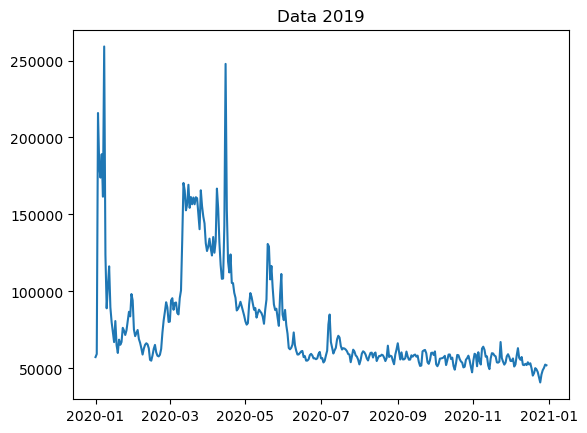

In [28]:
start_date = 365
final_date = 365*2
plot(data_2["time_1"][start_date:final_date],data_2["views"][start_date:final_date], label='Wikipedia - Spread')
title("Data 2019")

Text(0.5, 1.0, 'Data 2020')

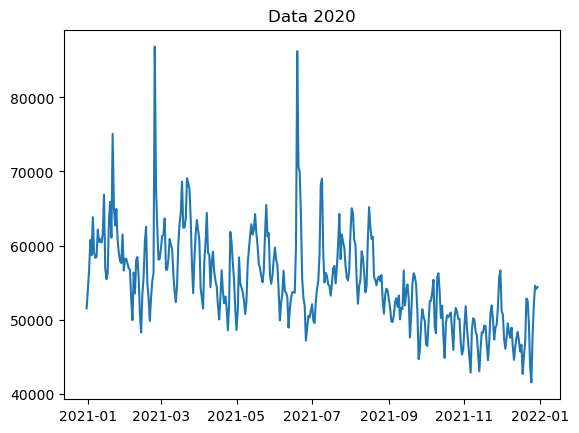

In [29]:
start_date = 365*2
final_date = 365*3
plot(data_2["time_1"][start_date:final_date],data_2["views"][start_date:final_date], label='Wikipedia - Spread')
title("Data 2020")

Text(0, 0.5, '# Views')

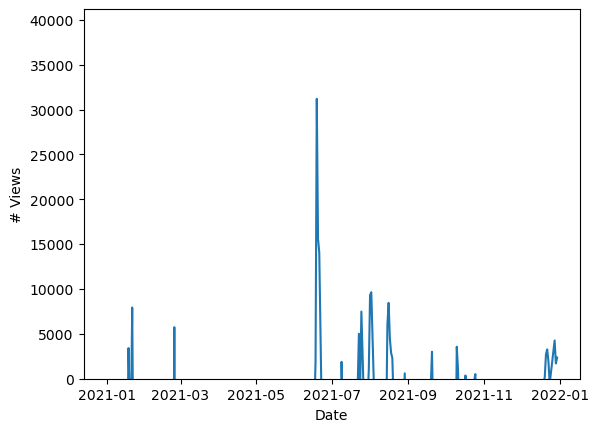

In [30]:
start_date_i = 365
final_date_i = 365*2
start_date_f = 365*2
final_date_f = 365*3

time         = data_2["time_1"][start_date_f:final_date_f]
increase     = array(data_2["views"][start_date_f:final_date_f])-array(data_2["views"][start_date_i:final_date_i])

plot( time ,\
      increase , label='Wikipedia - Spread')

ylim(0, max(increase)+10000)

xlabel("Date")
ylabel("# Views")

# Useful code - Victor: 

In [31]:
# Importing misinformation database from part II

wiki_pages_links = pd.read_csv(source+"covid-19_misinformation5.csv").copy()
word_cluster_1= "Virus origin" 
language      = "en"

def wiki_extract_time_increase(wiki_pages_links, word_cluster_1, language ):
    wiki_cluster_links_1 = wiki_pages_links[(wiki_pages_links["Main Heading"].str.contains(word_cluster_1))].copy()
    
    # Cleaning the clusters to only obtain words searcheable in wikipedia API
    def extract_clean_text(links):
        cleaned_links = []
        for link in links:
            if '/wiki/' in link:
                extracted_text = link.split('/wiki/')[1].split('#')[0].replace('_', ' ')
                cleaned_links.append(extracted_text)
        return cleaned_links
    
    # Convert string representation of list to actual list using ast.literal_eval and apply the function
    wiki_cluster_links_1["Cleaned_Text"] = wiki_cluster_links_1["Links"].apply(lambda x: extract_clean_text(ast.literal_eval(x)))
    
    
    # Looking for all the articles in the cluster 1 which correspond to Virus Origin 
    
    list_cluster_1 = list(wiki_cluster_links_1["Cleaned_Text"])
    
    final_count_1 =[]
    for i in list_cluster_1:
        results   = fetch_pageview_count(language, i)
        merged_df = pd.concat(results, ignore_index=True)
        #Grouping the dataframe to sum up the views
        merged_df = merged_df.groupby(['timestamp'])["views"].sum()
        final_count_1.append(pd.DataFrame(merged_df))
        
    final_views_1= pd.concat(final_count_1, ignore_index=False) 
    data_1 = final_views_1.groupby(['timestamp']).sum()
    data_1['time_1'] = pd.to_datetime(data_1.index, format='%d/%m/%Y')
    start_date_i = 365
    final_date_i = 365*2
    start_date_f = 365*2
    final_date_f = 365*3
    
    time         = data_1["time_1"][start_date_f:final_date_f]
    increase     = array(data_1["views"][start_date_f:final_date_f])-array(data_1["views"][start_date_i:final_date_i])
    
    return time, increase



    

In [33]:

wiki_pages_links = pd.read_csv(source+"covid-19_misinformation5.csv").copy()
word_cluster_1= "Disease spread" 
language      = "en"
t_time, t_increase = wiki_extract_time_increase(wiki_pages_links, word_cluster_1, language )


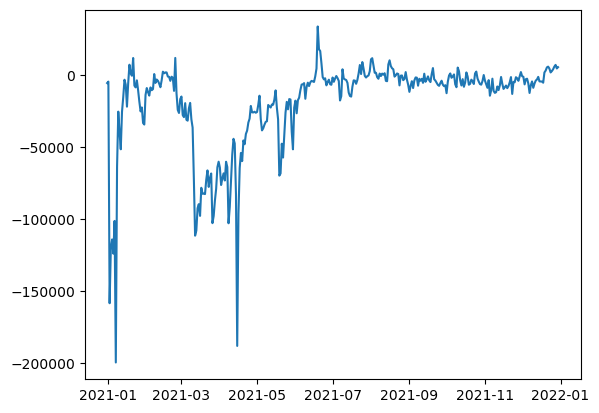

In [34]:
plot(t_time,t_increase)